<h2>Kaksinkertainen eksponentiaalinen tasoitus</h2>

Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.

Holtin malli sopii aikasrajoille, joissa on trendi, mutta ei kausivaihtelua.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Mallin hyvyyttä kuvaava statistiikka löytyy <b>sklearn.metrics</b>-kirjastosta.
Neliöjuuri löytyy <b>math</b>-kirjastosta.

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-2/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
series = [500,350,250,400,450,350,200,300,350,200,150,400,550,350,
        250,550,550,400,350,600,750,500,400,650,850]

index = pd.date_range('2000-03-31', periods=25, freq='Q')

data = pd.DataFrame(series, index=index).astype('float')
data.columns = ['Demand']

<h3>Mallin sovitus</h3>

Ennustemalli sovitetaan (<b>fit()</b>) dataan.
Tuloksena saadaan olio (tässä <b>malli</b>), joka sisältää monenlaista tietoa mallista.

In [3]:
malli = Holt(data['Demand']).fit()

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


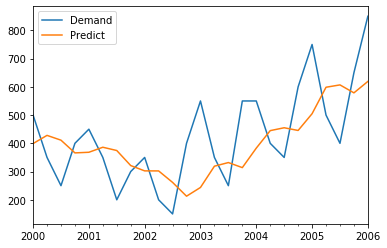

In [4]:
#malli-olion avulla saadaan mallin mukaan simuloidut ennusteet:
data['Predict'] = malli.fittedvalues

data.plot()

<h3>Mallin hyvyys</h3>

Vertaa yksinkertaiseen eksponentiaaliseen tasoitukseen.

In [5]:
sqrt(mean_squared_error(data['Demand'], data['Predict']))

146.35373320674327

In [6]:
mean_absolute_error(data['Demand'], data['Predict'])

124.62521942018994

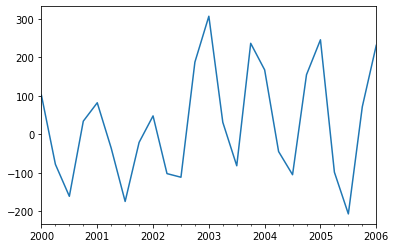

In [7]:
#Jäännöstermit löytyvät malli-oliosta:
data['Resid'] = malli.resid

data['Resid'].plot()

<h3>Ennusteiden laskeminen</h3>

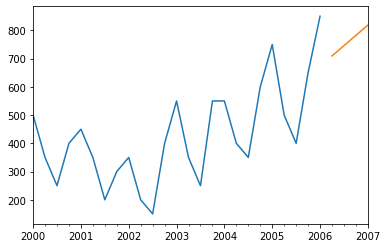

In [8]:
#Ennustettavien ajankohtien aikaleimat:
index = pd.date_range('2006-06-30', periods=4, freq='Q')

#Ennusteet malli-olion avulla:
datap = pd.DataFrame(malli.forecast(4), index=index)

#Nimeän ennusteiden sarakkeen:
datap.columns = ['Predict']

#Viivakuvio havainnoista:
data['Demand'].plot()

#Ennusteet kuvioon:
datap['Predict'].plot()

<h3>Mallin statistiikkaa</h3>

malli-oliosta löytyy monenlaista statistiikkaa:

In [9]:
malli.params

{'smoothing_level': 0.23301334131889478,
 'smoothing_slope': 0.23301297209039173,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 399.14124566401256,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<h3>Aikasarjan lähempää tarkastelua</h3>

<b>statsmodels.tsa</b>-kirjasto sisältää aikasarjan komponenttien erotteluun tarkoitetun <b>seasonal_decompose()</b>-työkalun. Aikasarjasta erottuu selvästi trendi- ja kausivaihtelukomponentit. Niiden lisäksi aikasarjassa on satunnaista vaihtelua.
    
<p><b>pandas.plotting</b>-kirjastosta löytyy <b>autocorrelation_plot()</b>-työkalu, joka esittää autokorrelaatiot. Esimerkiksi yhden periodin autokorrelaatio tarkoittaa aikasarjan ja yhdellä periodilla viivästetyn (<b>lag</b>) aikasarjan välistä korrelaatiota. Tässä tapauksessa neljän periodin autokorrelaatio merkitsevästi nollasta poikkeava (katkoviivojen ulkopuolella). Tämä vahvistaa kausivaihtelujakson pituuden olevan 4 periodia.

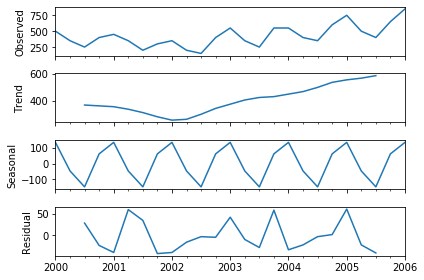

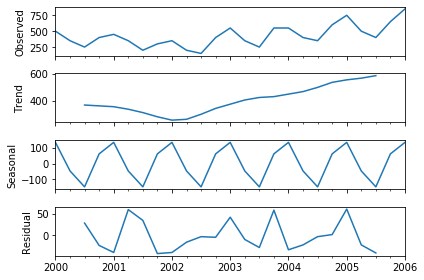

In [10]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(data['Demand']).plot()

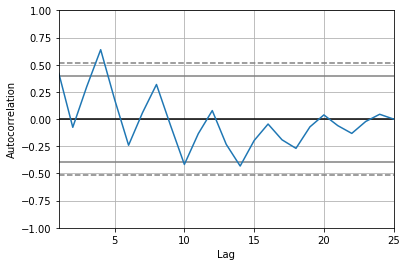

In [11]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(data['Demand'])